In [1]:
import numpy as np
from tqdm import tqdm

from src.visualization import plot_result
from src.algorithms import LocalSearchTSP, CandidateSteepestLocalSearchTSP, MultipleStartLocalSearch, IteratedLocalSearch

In [2]:
def pretty_print_msls(algorithm, values):
    min_time, max_time, avg_time, minv, maxv, avgv = values
    print(f'Algorithm: {algorithm}:')
    print(f'    objective: {avgv}({int(minv)} - {int(maxv)})')
    print(f'    times: {avg_time}({min_time} - {max_time})')
    print('========================================================')

def pretty_print_ils(algorithm, values):
    min_time, max_time, avg_time, minv, maxv, avgv, min_iters, max_iters, avg_iters = values
    print(f'Algorithm: {algorithm}:')
    print(f'    objective: {avgv}({int(minv)} - {int(maxv)})')
    print(f'    times: {avg_time}({min_time} - {max_time})')
    print(f'    iterations: {avg_iters}({min_iters} - {max_iters})')
    print('========================================================')

In [3]:
def experiments(node_path):
    seed = 841
    nodes_instance = np.genfromtxt(node_path, dtype=int, delimiter=';')
    algorithms_msls = {
        'msls_steepest': MultipleStartLocalSearch(node_path, LocalSearchTSP('steepest', node_path, 'edges', 'random'))
    }
    results_msls = {}
    for key, algorithm in tqdm(algorithms_msls.items()):
        result = algorithm.run_experiment(seed=seed)
        results_msls[key] = result

    for key, result in results_msls.items():
        values = result[:-2]
        pretty_print_msls(key, values)

    for key, result in results_msls.items():
        minv, path = result[3], result[-2]
        plot_result(nodes_instance, path, minv)
        print('===============================================================')

    algorithms_ils = {
        'ils_steepest': IteratedLocalSearch(node_path, LocalSearchTSP('steepest', node_path, 'edges', 'random'), max_time=results_msls['msls_steepest'][2])
    }

    results_ils = {}
    for key, algorithm in tqdm(algorithms_ils.items()):
        result = algorithm.run_experiment(seed=seed)
        results_ils[key] = result

    for key, result in results_ils.items():
        values = result[:-2]
        pretty_print_ils(key, values)

    for key, result in results_ils.items():
        minv, path = result[3], result[-2]
        plot_result(nodes_instance, path, minv)
        print('===============================================================')

# Instance C

100%|██████████| 1/1 [1:28:24<00:00, 5304.39s/it]


Algorithm: msls_steepest:
    objective: 49172.0(48919 - 49490)
    times: 530.4385324001312(524.3625798225403 - 535.30118227005)


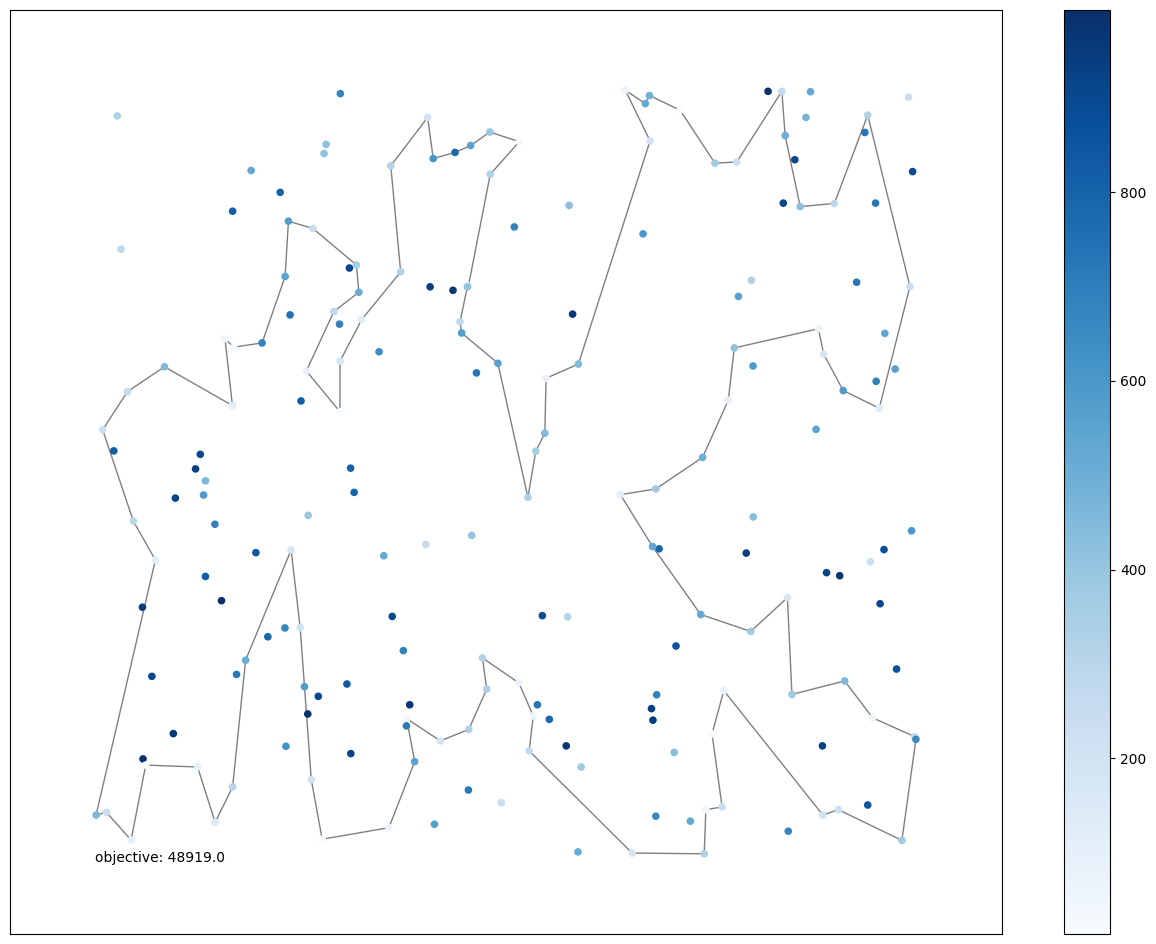

100%|██████████| 1/1 [1:28:24<00:00, 5304.39s/it]

Algorithm: ils_steepest:
    objective: 48406.0(47907 - 48861)
    times: 530.4386024236679(530.4385628700256 - 530.4388225078583)
    iterations: 1794.6(1774 - 1817)


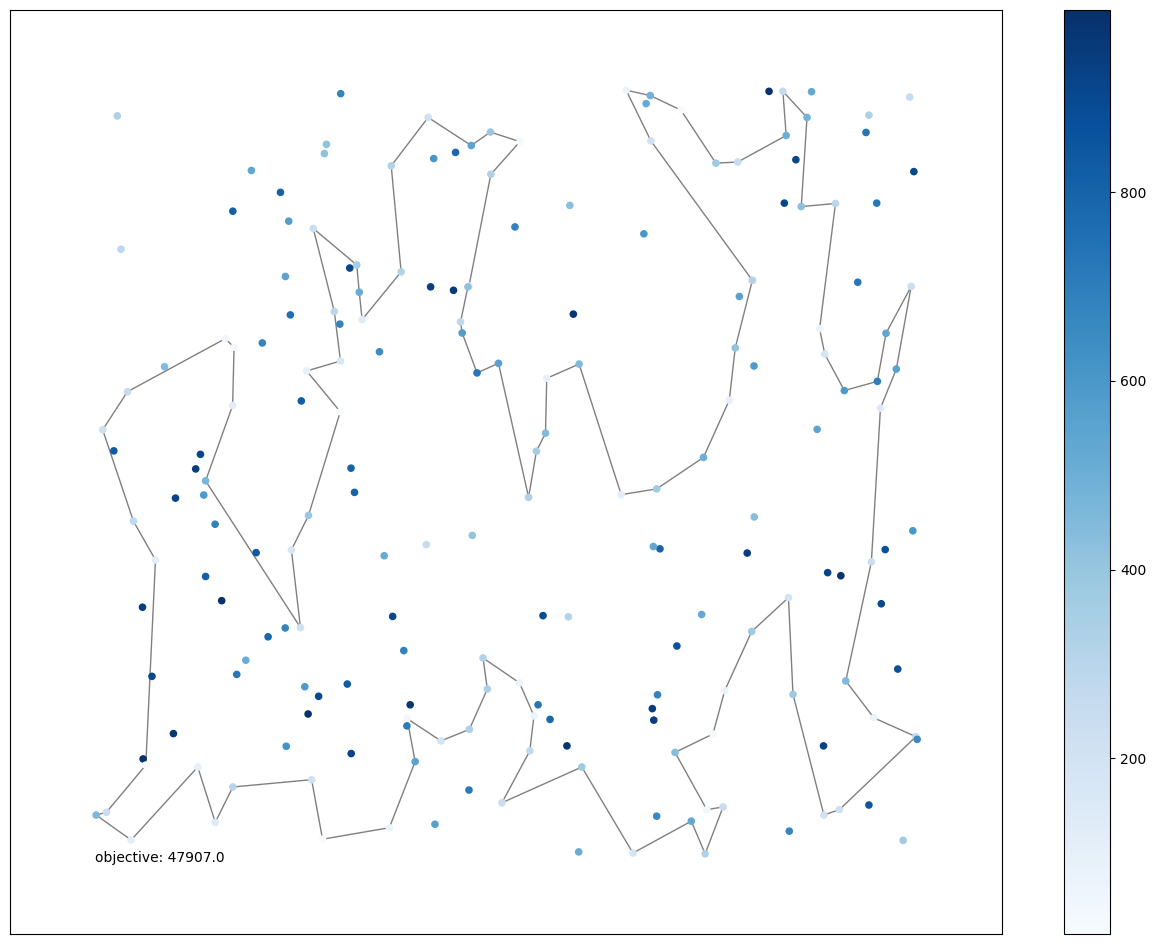

In [4]:
node_path_C = '../data/TSPC.csv'
experiments(node_path_C)

# Instance D

100%|██████████| 1/1 [1:30:24<00:00, 5424.16s/it]

Algorithm: msls_steepest:
    objective: 45491.4(44722 - 45973)
    times: 542.4154284715653(535.7485384941101 - 548.1898257732391)


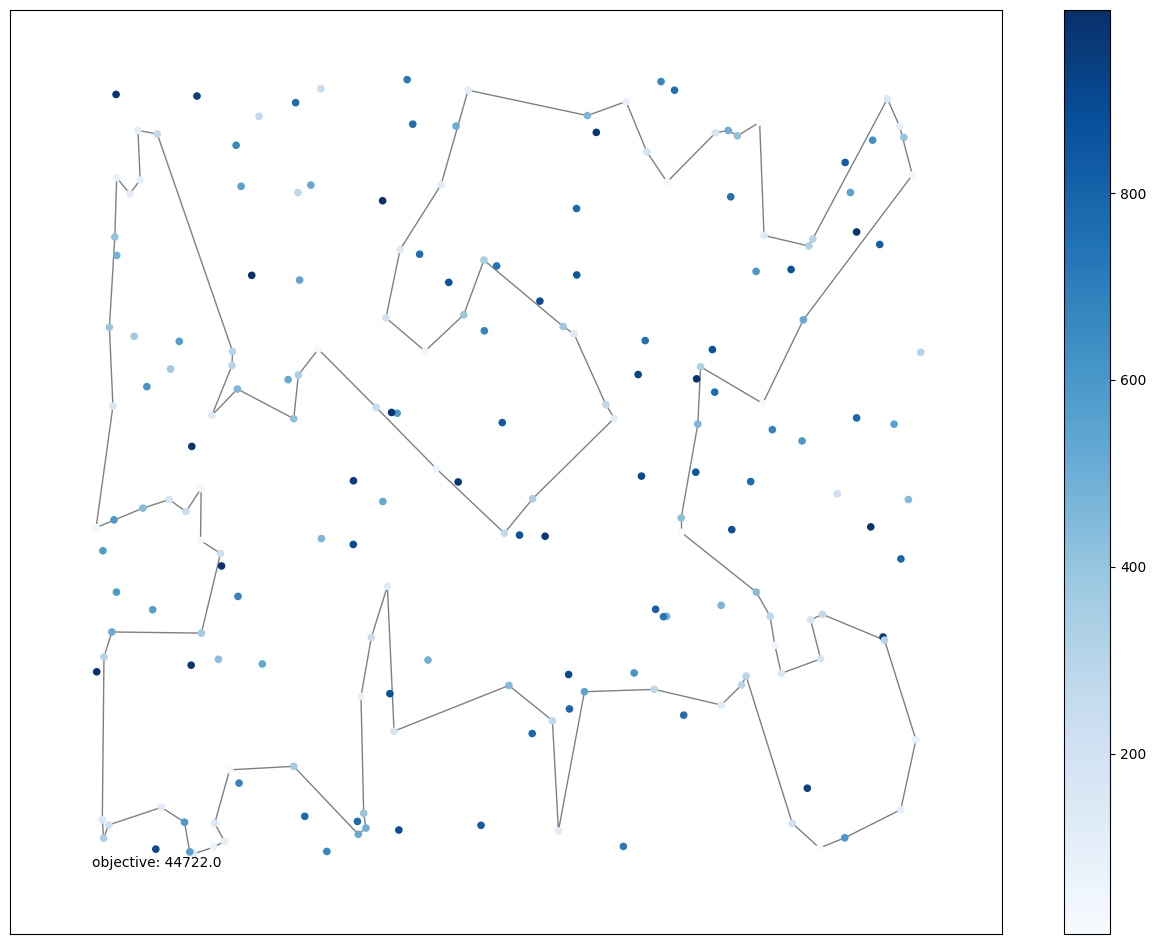

100%|██████████| 1/1 [1:30:24<00:00, 5424.16s/it]

Algorithm: ils_steepest:
    objective: 44435.3(44039 - 44893)
    times: 542.4154700040817(542.4154601097107 - 542.4154779911041)
    iterations: 1786.8(1750 - 1817)


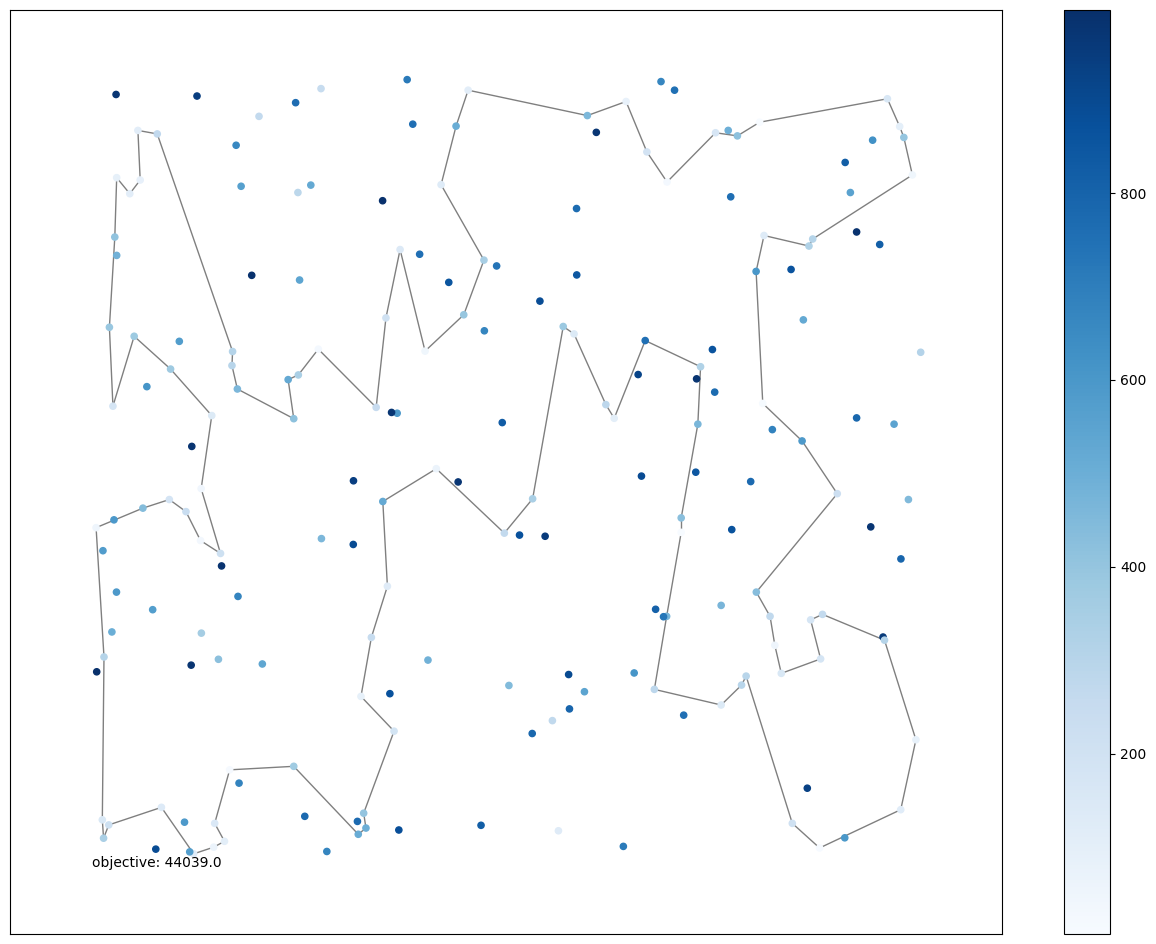

In [5]:
node_path_D = '../data/TSPD.csv'
experiments(node_path_D)